There's been some discrepancy with the normalization(?) of the 3PCF. This notebook is to examine the output. 

In [1]:
import numpy as np 
from emanu import util as UT
from emanu import obvs as Obvs

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
import matplotlib.colors as colors
# set the colormap and centre the colorbar
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [4]:
def read3PCF(mneut, i, nzbin, zspace=False, nside=20, nbin=20): 
    tpcf_i = Obvs.threePCF_halo(mneut, i, nzbin, zspace=zspace, nside=nside, nbin=nbin)
    
    for ell in range(11): 
        if ell == 0: 
            tpcf_mat = np.zeros((11, tpcf_i[0].shape[0], tpcf_i[0].shape[1]))
            tpcf_mat[0] = tpcf_i[0]
        else: 
            tpcf_mat[ell] = tpcf_i[ell]
    return tpcf_mat

In [5]:
mneut = 0.0
nzbin = 4
zspace = False

tpcfs = [] 
for ireal in range(1,51): 
    tpcfs.append(read3PCF(mneut, ireal, nzbin, zspace=zspace, nside=20, nbin=20))
tpcfs = np.array(tpcfs)
mu_tpcfs = np.average(tpcfs, axis=0)

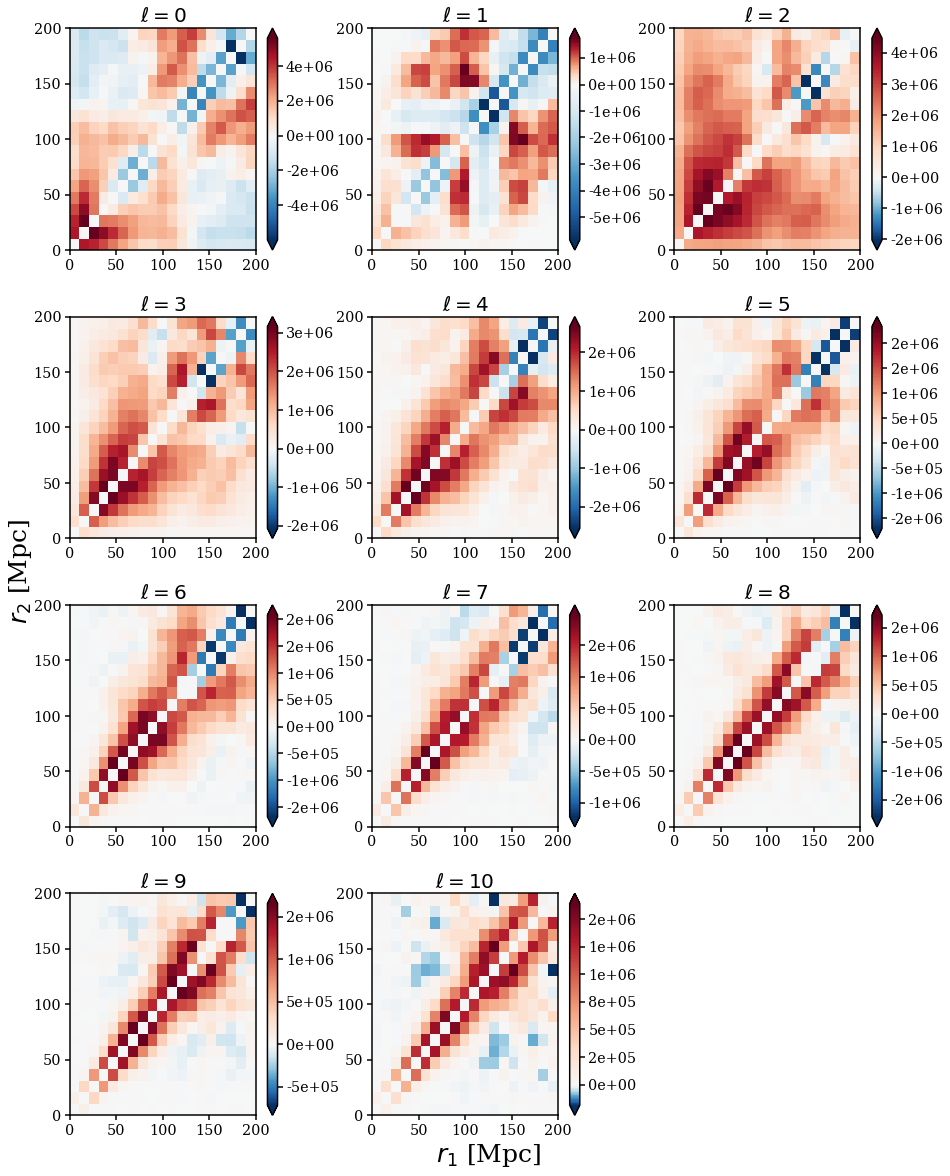

In [7]:
fig = plt.figure(figsize=(15,20))
bkgd = fig.add_subplot(111, frameon=False)
for ell in range(11):
    sub = fig.add_subplot(4,3,ell+1)
    cont = sub.pcolormesh(np.linspace(0., 200., mu_tpcfs[0][0].shape[0]), np.linspace(0., 200., mu_tpcfs[0][0].shape[0]), 
                          mu_tpcfs[ell], cmap='RdBu_r', norm=MidpointNormalize(midpoint=0.)) #, cmap='afmhot')
    plt.colorbar(cont, format='%.0e', extend='both')
    sub.set_title("$\ell="+str(ell)+"$", fontsize=20)
    
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
bkgd.set_xlabel(r'$r_1$ [Mpc]', fontsize=25)
bkgd.set_ylabel(r'$r_2$ [Mpc]', fontsize=25)
fig.subplots_adjust(hspace=0.3, wspace=0.3)